# Знакомство с машинным обучением

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Загружаем необходимые библиотеки.

In [2]:
from statistics import correlation

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [3]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [4]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [8]:
# ваш код здесь
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).  
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'House Price')

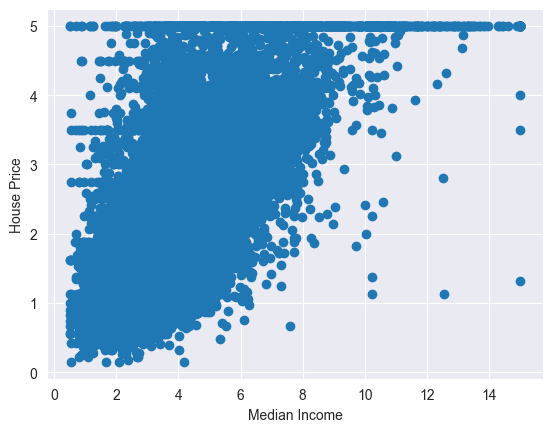

In [6]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.  
Какая это зависимость?

Text(0, 0.5, 'House Price')

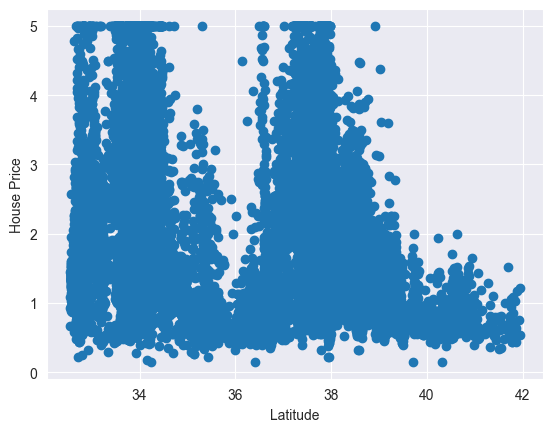

In [12]:
# ваш код здесь
plt.scatter(X['Latitude'], y)
plt.xlabel('Latitude')
plt.ylabel('House Price')

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

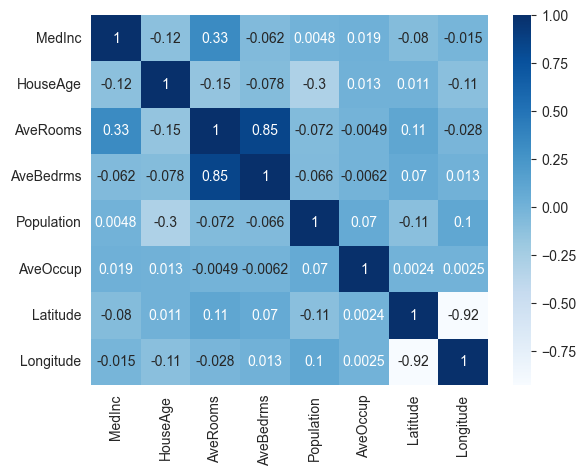

In [13]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимых признака - это `AveRooms` и `AveBedrms`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.  
Какой признак имеет наибольшую по модулю корреляцию с таргетом?  
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

In [32]:
# ваш код здесь
X['target'] = y
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).


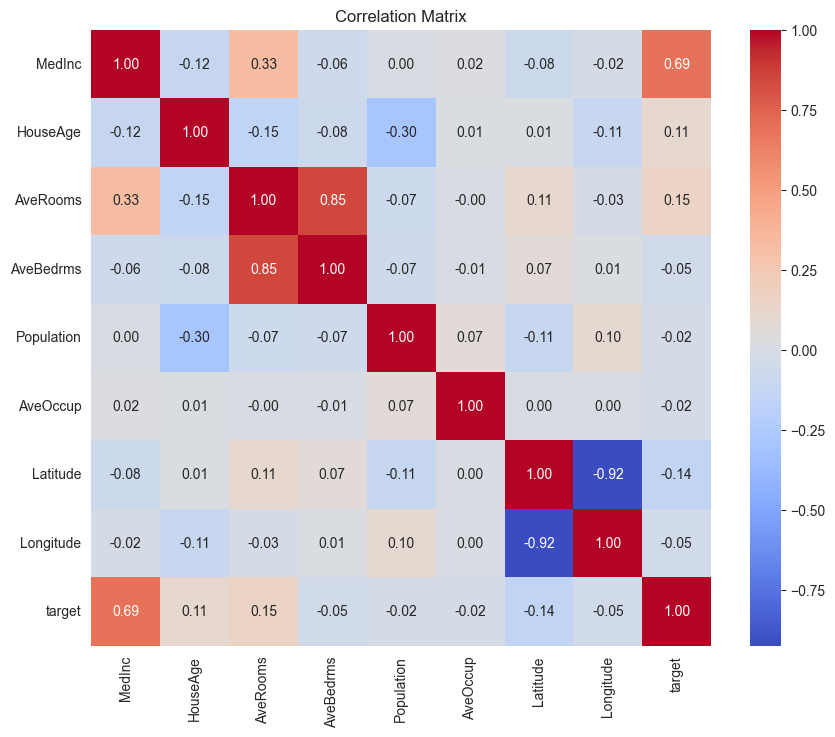

In [18]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
# annot=True — отображает числовые значения корреляции в ячейках.
# cmap='coolwarm' — задает цветовую схему (от синего для отрицательной корреляции до красного для положительной).
# fmt='.2f' — форматирует числа до двух знаков после запятой.
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Извлекаем корреляции с целевой переменной (target)

target_correlations = correlation_matrix['target'].drop('target')  # Удаляем корреляцию target с самим собой

# Находим признак с наибольшей по модулю корреляцией
max_corr_feature = target_correlations.abs().idxmax()
max_corr_value = target_correlations[max_corr_feature]

print(f"Признак с наибольшей по модулю корреляцией с target: {max_corr_feature}")
print(f"Значение корреляции: {max_corr_value:.2f}")
# correlation_matrix['target']
target_correlations # корреляции с переменной target без самой колонки target(она 1.00 будет всегда)

Признак с наибольшей по модулю корреляцией с target: MedInc
Значение корреляции: 0.69


MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Name: target, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split


X = X.drop('target', axis=1) # axis=1 значит мы удаляем столбец а не строку
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=123) # ваш код здесь
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


##Задание 4

Сколько объектов попали в тест?

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [36]:
# сколько данных попали в тест
Xtrain.shape[0]

15480

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение на тренировочных данных

# Предсказание на тестовых данных
y_pred = model.predict(Xtest)
print(y_pred[:10]) # выведет предсказанные стоимости первых 10 домов из тестовой выборки

[2.3874481  1.43302789 2.0358385  1.6116887  2.65649904 2.14355879
 1.48218918 2.07125707 2.04762404 1.62782809]


## Задание 5

Вычислите значение метрики *MSE* на тестовых данных.  
Ответ округлите до десятых.

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Оценка модели
mse = mean_squared_error(ytest, y_pred) # среднеквадратичная ошибка
rmse = np.sqrt(mse)  # Вычисление RMSE - корень из среднеквадратичной ошибки

print('Среднеквадратичная ошибка:', mse)


print('Корень из среднеквадратичной ошибки:', rmse)

Среднеквадратичная ошибка: 0.51629877340429
Корень из среднеквадратичной ошибки: 0.7185393332339504


In [46]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1000)  # alpha — это параметр регуляризации
ridge_model.fit(Xtrain, ytrain)
y_pred_ridge = ridge_model.predict(Xtest)
mse_ridge = mean_squared_error(ytest, y_pred_ridge)
print('MSE с Ridge:', mse_ridge)

MSE с Ridge: 0.5266448510034771


In [65]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.00001, l1_ratio=0.0001)  # l1_ratio задаёт баланс между L1 и L2
elastic_model.fit(Xtrain, ytrain)
y_pred_elastic = elastic_model.predict(Xtest)
mse_elastic = mean_squared_error(ytest, y_pred_elastic)
print('MSE с Elastic Net:', mse_elastic)

MSE с Elastic Net: 0.51629915322415


ШЫЫЫЫЫЫЫЫШ